### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

# Import Library

In [3]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Import Dataset

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/rizkyjisantt-dev/ml-student-scores/refs/heads/main/student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis (EDA)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

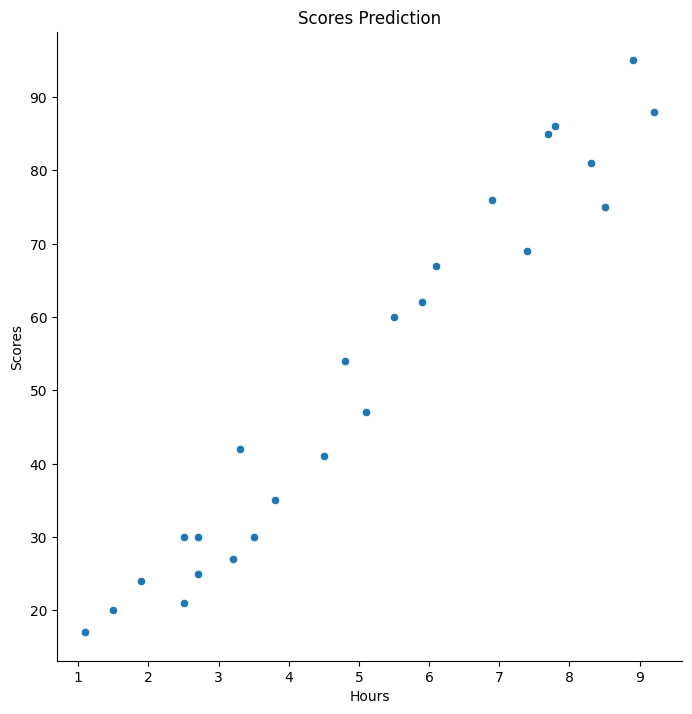

In [7]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores Prediction')
plt.show()

## Penjelasan Scatter Plot: Scores Prediction

Plot di atas merupakan scatter plot yang menunjukkan hubungan antara jumlah jam belajar (*Hours*) dengan skor yang diperoleh (*Scores*).

Dari visualisasi ini, terlihat adanya pola yang cukup jelas di mana semakin banyak jam belajar, semakin tinggi skor yang diperoleh. Hal ini mengindikasikan adanya hubungan positif antara kedua variabel tersebut.

Scatter plot ini biasanya digunakan untuk melihat pola dalam data sebelum melakukan pemodelan regresi, seperti regresi linear atau decision tree, sebagaimana yang tercantum dalam daftar isi notebook ini. Jika hubungan antara *Hours* dan *Scores* bersifat linear, maka model regresi linear mungkin akan memberikan hasil prediksi yang cukup akurat.


# Feature Engineering
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis
4. Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.

In [8]:
df = data.copy()

## Check duplicated data

In [9]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(25, 2)


In [10]:
print("Duplicated Data:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicated Data: 0


## Check Missing Value Handling

In [11]:
print("Missing Values:")
print(df.isnull().sum())
df = df.fillna(df.mean())  # Isi dengan mean jika ada missing value

Missing Values:
Hours     0
Scores    0
dtype: int64


## Outlier Analysis

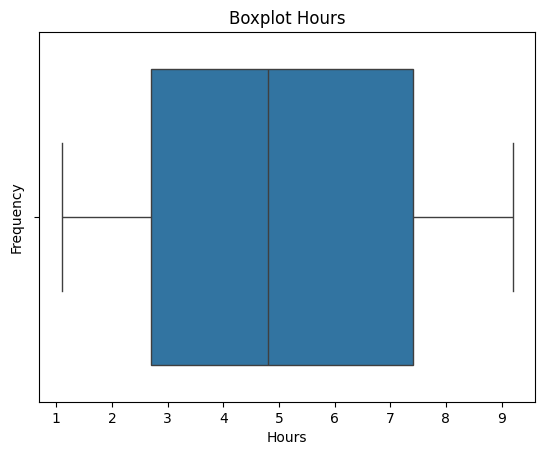

In [12]:
# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours")
plt.ylabel("Frequency")  # Anda bisa menggunakan "Hours" atau "Tahun Pengalaman"
plt.title("Boxplot Hours")

# Menampilkan plot
plt.show()

# Splitting the data

In [13]:
X = df['Hours']
y = df['Scores']

# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15 , size train > test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)
# X_train dan y_train -> knowledge dari dosen ke mahasiswa (X_train contoh soal), y_train (kunci jawaban dari contoh soal)
# X_test dan y_test -> soal2 ujian (UTS maupun UAS) (X_test), y_test (kunci jawaban dosennya / data aktual)

# Modelling

## Linear Regression

In [14]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [15]:
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy() # Kolom x nya ada 1 saja, jika lebih dari 1 untuk x nya maka tidak code to_numpy() dibiarkan dalam bentuk dataframe
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [16]:
#array
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [17]:
#array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [18]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [19]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [20]:
# Fitting the model using Linear Regression
lr_model = LinearRegression() # Mahasiswa A
lr_model.fit(X_train,y_train) # Belajar

LinearRegression()

In [21]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([52.02223727, 39.39391742, 17.05150538, 33.56546211, 46.19378196,
       88.93578761, 85.05015073, 36.47968977, 28.70841601, 20.93714226,
       49.10800962, 61.73632947, 78.25028619, 55.90787415, 77.27887697,
       13.1658685 , 74.36464932, 91.85001526])

In [22]:
# Predicting the Salary for the Test values
y_pred = lr_model.predict(X_test) # UTS ataupun UAS
# y_pred -> jawaban mahasiswa linear regression

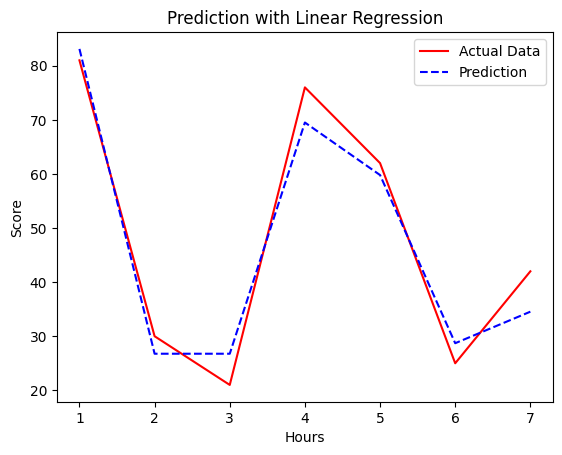

In [23]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

### Analisis Kualitatif  
Grafik di atas menunjukkan hasil prediksi menggunakan regresi linear.  
- Garis merah menunjukkan data aktual (*Actual Data*).  
- Garis biru putus-putus menunjukkan prediksi model (*Prediction*).  
- Secara visual, prediksi model cukup mengikuti pola data aktual, meskipun ada beberapa deviasi.  

Jika garis biru sangat mendekati garis merah, berarti model memiliki performa yang baik dalam memprediksi nilai target. Namun, jika terdapat deviasi yang besar, model mungkin perlu diperbaiki dengan teknik seperti tuning parameter atau mencoba model lain.  

In [24]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


### Analisis Kuantitatif:  
Dari hasil running kode:  
r square Linear Regression: 0.9553509219739938

Interpretasi dari nilai ini:  
- Nilai **R² = 0.955** menunjukkan bahwa model dapat menjelaskan sekitar **95.5% variabilitas data**.  
- Ini berarti model memiliki akurasi yang tinggi dan mampu menangkap hubungan antara jumlah jam belajar dan skor dengan baik.  
- Sisanya **4.5%** (1 - 0.955) merupakan variabilitas yang tidak bisa dijelaskan oleh model, yang mungkin disebabkan oleh faktor lain yang tidak dimasukkan dalam model, seperti metode belajar, tingkat pemahaman individu, atau faktor eksternal lainnya.  

Kesimpulan:  
- Model regresi linear yang digunakan menunjukkan performa yang sangat baik dalam memprediksi *Scores* berdasarkan *Hours*.  
- Namun, sebelum mengambil kesimpulan akhir, perlu juga diperiksa metrik lainnya seperti *Mean Squared Error (MSE)* untuk melihat seberapa besar kesalahan prediksi model.  
- Jika model terlalu sederhana atau terjadi pola yang tidak linear, bisa dipertimbangkan model lain seperti *Polynomial Regression* atau *Decision Tree Regression* untuk meningkatkan akurasi prediksi.  


In [25]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.4803670915057623
Coefficient of the line Linear Regression: [9.71409219]


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor # mahasiswa B

In [27]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
# Predicting the Salary for the Test values
y_pred_dt = dt_model.predict(X_test) # soal uts maupun uas

In [29]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

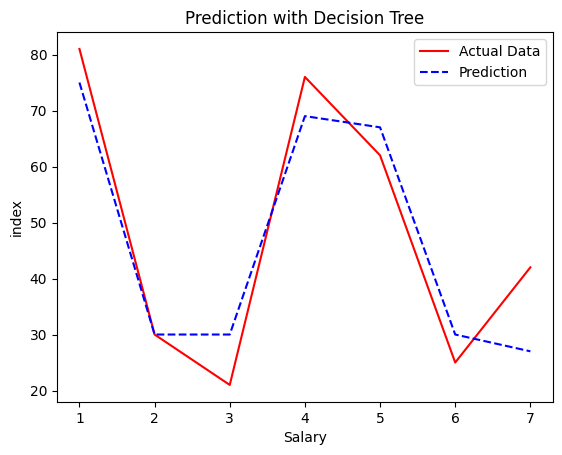

In [30]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

### Analisis Kualitatif Model Decision Tree Regression  

Interpretasi Grafik  
Grafik menunjukkan perbandingan antara **data aktual (garis merah solid)** dan **hasil prediksi model Decision Tree Regression (garis biru putus-putus)**.  

Dari pola grafik, dapat diamati beberapa karakteristik utama:  
1. **Overfitting Kemungkinan Terjadi**  
   - Model *Decision Tree* terlihat mampu menangkap pola data dengan cukup baik, tetapi ada indikasi overfitting.  
   - Hal ini terlihat dari pola prediksi yang cenderung mengikuti nilai aktual secara ketat, dengan banyak perubahan tajam.  

2. **Keakuratan Prediksi**  
   - Pada beberapa titik, prediksi cukup akurat dengan garis biru yang hampir berimpit dengan garis merah.  
   - Namun, pada beberapa titik lainnya, model gagal menangkap pola yang lebih halus dan menghasilkan perubahan nilai yang lebih drastis.  

3. **Kurangnya Kemampuan Generalisasi**  
   - *Decision Tree* bekerja dengan cara membagi data ke dalam beberapa *nodes* berdasarkan aturan tertentu.  
   - Model ini sering kali terlalu spesifik terhadap data latih (*training data*), menyebabkan kurangnya kemampuan generalisasi untuk data baru.  

Kesimpulan  
- **Decision Tree Regression** dapat memberikan hasil prediksi yang mendekati data aktual, tetapi rentan terhadap overfitting.  
- Jika model menunjukkan performa yang kurang optimal pada data baru, bisa dipertimbangkan pendekatan lain seperti *Random Forest Regression* atau *Pruning* untuk mengurangi overfitting.  
- Alternatif lainnya adalah mencoba hyperparameter tuning, seperti membatasi kedalaman pohon (*max_depth*) atau jumlah sampel minimum per *leaf node*.  


In [31]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8803859268443893


### Analisis Kuantitatif Model Decision Tree Regression  

Evaluasi dengan R-squared (R²)  
Hasil evaluasi model *Decision Tree Regression* menggunakan metrik **R-squared (R²)** menunjukkan nilai:  

**R² = 0.8804** (dibulatkan ke 4 desimal)  

Interpretasi Nilai R²  
1. **Tingkat Akurasi**  
   - Nilai **R² sebesar 0.8804** menunjukkan bahwa model mampu menjelaskan sekitar **88.04%** variabilitas data target berdasarkan fitur yang digunakan.  
   - Ini berarti model memiliki performa yang cukup baik dalam menangkap pola dari data, tetapi masih memiliki ruang untuk perbaikan.  

2. **Dibandingkan dengan Model Linear Regression**  
   - Sebelumnya, model *Linear Regression* memiliki **R² = 0.9554**, yang lebih tinggi dibandingkan dengan *Decision Tree Regression*.
   - Hal ini menunjukkan bahwa *Linear Regression* lebih mampu menjelaskan hubungan dalam data dengan lebih baik dibandingkan *Decision Tree* untuk kasus ini.  

3. **Kemungkinan Overfitting**  
   - Meskipun nilai R² cukup tinggi, model *Decision Tree* sering kali rentan terhadap **overfitting**, terutama jika kedalaman pohon terlalu besar.
   - Overfitting dapat menyebabkan model bekerja sangat baik pada data pelatihan tetapi kurang mampu memprediksi data baru dengan baik.  

Kesimpulan  
- **Decision Tree Regression** memiliki performa yang cukup baik dengan R² = 0.8804.  
- Namun, model *Linear Regression* memiliki performa lebih tinggi dalam kasus ini (R² = 0.9554).  
- Untuk meningkatkan performa *Decision Tree*, dapat dilakukan teknik seperti **pruning**, **hyperparameter tuning**, atau mencoba model ansambel seperti **Random Forest Regression**.  
